## Introduction to Data Science

***

## Project Description

Rosie Reeves is an entrepreneurial middle-school student who sells homemade cold drinks from a stand during the summer months. This summer, Rosie sold two flavors of drink (lemon and orange) at two different locations (the beach and the park); and to promote her drinks stall, she distributed leaflets in the local area. Rosie recorded details of her sales and leaflet distribution in a text file, along with a note of the temperature each day.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

#import os
#import zipfile
import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Lemonade2016.csv")

In [3]:
df

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,7/1/2016,Park,97,67,70,90.00,0.25
1,7/2/2016,Park,98,67,72,90.00,0.25
2,7/3/2016,Park,110,77,71,104.00,0.25
3,7/4/2016,Beach,134,99,76,98.00,0.25
4,7/5/2016,Beach,159,118,78,135.00,0.25
5,7/6/2016,Beach,103,69,82,90.00,0.25
6,7/6/2016,Beach,103,69,82,90.00,0.25
7,7/7/2016,Beach,143,101,81,135.00,0.25
8,NaN,Beach,123,86,82,113.00,0.25
9,7/9/2016,Beach,134,95,80,126.00,0.25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         31 non-null     object 
 1   Location     32 non-null     object 
 2   Lemon        32 non-null     int64  
 3   Orange       32 non-null     int64  
 4   Temperature  32 non-null     int64  
 5   Leaflets     31 non-null     float64
 6   Price        32 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.9+ KB


In [5]:
df.describe()

,Lemon,Orange,Temperature,Leaflets,Price
count,32.00,32.00,32.00,31.00,32.00
mean,116.16,80.00,78.97,108.55,0.35
std,25.82,21.86,4.07,20.12,0.11
min,71.00,42.00,70.00,68.00,0.25
25%,98.00,66.75,77.00,90.00,0.25
50%,113.50,76.50,80.50,108.00,0.35
75%,131.75,95.00,82.00,124.00,0.50
max,176.00,129.00,84.00,158.00,0.50


In [6]:
df.columns

Index(['Date', 'Location', 'Lemon', 'Orange', 'Temperature', 'Leaflets', 'Price'], dtype='object')

### Treat Missing Values

In [7]:
df.isnull().sum()

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64

In [8]:
df['Leaflets'] = df['Leaflets'].replace(np.nan,108.55)

In [9]:
df.isnull().sum()

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       0
Price          0
dtype: int64

In [10]:
df["Date"] = df['Date'].fillna("7/8/2016")

In [11]:
df

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,7/1/2016,Park,97,67,70,90.00,0.25
1,7/2/2016,Park,98,67,72,90.00,0.25
2,7/3/2016,Park,110,77,71,104.00,0.25
3,7/4/2016,Beach,134,99,76,98.00,0.25
4,7/5/2016,Beach,159,118,78,135.00,0.25
5,7/6/2016,Beach,103,69,82,90.00,0.25
6,7/6/2016,Beach,103,69,82,90.00,0.25
7,7/7/2016,Beach,143,101,81,135.00,0.25
8,7/8/2016,Beach,123,86,82,113.00,0.25
9,7/9/2016,Beach,134,95,80,126.00,0.25


### Treat Duplicate Values

In [12]:
df.duplicated(keep='first').sum()

1

In [13]:
df[df.duplicated(keep=False)] #Check duplicate values

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
5,7/6/2016,Beach,103,69,82,90.00,0.25
6,7/6/2016,Beach,103,69,82,90.00,0.25


In [14]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [15]:
df.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,7/1/2016,Park,97,67,70,90.00,0.25
1,7/2/2016,Park,98,67,72,90.00,0.25
2,7/3/2016,Park,110,77,71,104.00,0.25
3,7/4/2016,Beach,134,99,76,98.00,0.25
4,7/5/2016,Beach,159,118,78,135.00,0.25


In [16]:
df["Sales"] = df["Lemon"] + df["Orange"]

In [17]:
df.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales
0,7/1/2016,Park,97,67,70,90.00,0.25,164
1,7/2/2016,Park,98,67,72,90.00,0.25,165
2,7/3/2016,Park,110,77,71,104.00,0.25,187
3,7/4/2016,Beach,134,99,76,98.00,0.25,233
4,7/5/2016,Beach,159,118,78,135.00,0.25,277


In [18]:
df["Revenue"] = df["Sales"] * df["Price"]

In [19]:
df.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,7/1/2016,Park,97,67,70,90.00,0.25,164,41.00
1,7/2/2016,Park,98,67,72,90.00,0.25,165,41.25
2,7/3/2016,Park,110,77,71,104.00,0.25,187,46.75
3,7/4/2016,Beach,134,99,76,98.00,0.25,233,58.25
4,7/5/2016,Beach,159,118,78,135.00,0.25,277,69.25


### Save to CSV

In [20]:
df.to_csv("rosie.csv", index=False)

In [21]:
df.describe()

,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
count,31.00,31.00,31.00,31.00,31.00,31.00,31.00
mean,116.58,80.35,78.87,109.15,0.36,196.94,68.97
std,26.14,22.13,4.10,19.82,0.11,48.23,24.61
min,71.00,42.00,70.00,68.00,0.25,113.00,41.00
25%,98.00,66.50,77.00,92.50,0.25,164.50,52.00
50%,115.00,77.00,80.00,108.00,0.35,191.00,59.50
75%,132.50,95.00,82.00,124.00,0.50,227.00,86.75
max,176.00,129.00,84.00,158.00,0.50,305.00,134.50


In [22]:
df["Temperature"].nlargest(3)

11    84
24    84
10    83
Name: Temperature, dtype: int64

In [23]:
df["Temperature"].nsmallest(3)

0     70
19    70
2     71
Name: Temperature, dtype: int64

## Data Visualization

In [24]:
df.columns

Index(['Date', 'Location', 'Lemon', 'Orange', 'Temperature', 'Leaflets', 'Price', 'Sales', 'Revenue'], dtype='object')

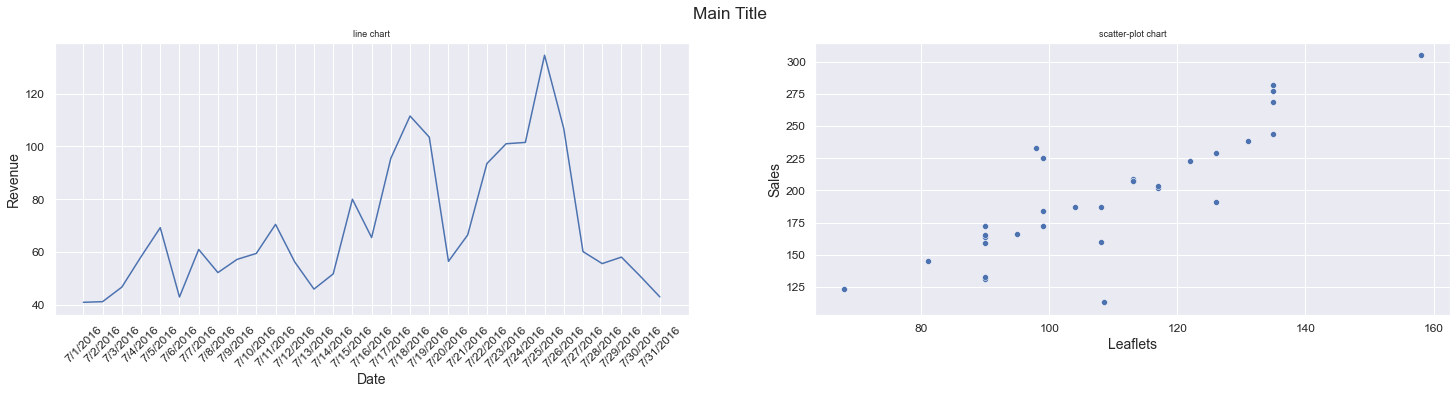

In [25]:
fig, ax = plt.subplots(1,2, sharex=False, figsize=(25,5))
fig.suptitle('Main Title')

sns.lineplot(x="Date", y="Revenue", data=df, ax=ax[0])
ax[0].set_title('line chart')
ax[0].tick_params('x', labelrotation=45)

sns.scatterplot(x="Leaflets", y="Sales", data=df, ax=ax[1])
ax[1].set_title('scatter-plot chart')

plt.show()

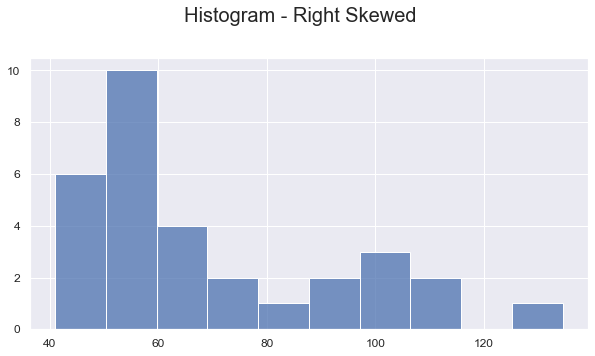

In [26]:
plt.figure(figsize=(10,5))

sns.histplot(x="Revenue", data=df, bins=10)

plt.xlabel("", size=20)
plt.ylabel("", size=20)
plt.suptitle('Histogram - Right Skewed', x=0.5, y=1.02, ha='center', fontsize=20)
plt.show()

In [27]:
df.columns

Index(['Date', 'Location', 'Lemon', 'Orange', 'Temperature', 'Leaflets', 'Price', 'Sales', 'Revenue'], dtype='object')

In [28]:
df[['Temperature', 'Leaflets', 'Price', 'Sales']].describe()

,Temperature,Leaflets,Price,Sales
count,31.00,31.00,31.00,31.00
mean,78.87,109.15,0.36,196.94
std,4.10,19.82,0.11,48.23
min,70.00,68.00,0.25,113.00
25%,77.00,92.50,0.25,164.50
50%,80.00,108.00,0.35,191.00
75%,82.00,124.00,0.50,227.00
max,84.00,158.00,0.50,305.00


In [29]:
df[['Temperature', 'Leaflets', 'Price', 'Sales']].corr()

,Temperature,Leaflets,Price,Sales
Temperature,1.00,0.29,-0.03,0.47
Leaflets,0.29,1.00,0.03,0.85
Price,-0.03,0.03,1.00,-0.29
Sales,0.47,0.85,-0.29,1.00


## Hypothesis Testing

The goal of hypothesis testing is to answer the question, “Given a sample and an apparent effect, what is the probability of seeing such an effect by chance?” The first step is to quantify the size of the apparent effect by choosing a test statistic (t-test, ANOVA, etc). The next step is to define a null hypothesis, which is a model of the system based on the assumption that the apparent effect is not real. Then compute the p-value, which is the probability of the null hypothesis being true, and finally interpret the result of the p-value, if the value is low, the effect is said to be statistically significant, which means that the null hypothesis may not be accurate.

### T-Test

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

-   One independent, categorical variable with two levels or group
-   One dependent continuous variable
-   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
-   The dependent variable must follow a normal distribution
-   Assumption of homogeneity of variance


State the hypothesis

-   $H_0: µ\_1 = µ\_2$ ("there is no difference in evaluation scores between male and females")
-   $H_1: µ\_1 ≠ µ\_2$ ("there is a difference in evaluation scores between male and females")


## T-Test

In [30]:
df[['Lemon', 'Orange']].describe()

,Lemon,Orange
count,31.00,31.00
mean,116.58,80.35
std,26.14,22.13
min,71.00,42.00
25%,98.00,66.50
50%,115.00,77.00
75%,132.50,95.00
max,176.00,129.00


### Two Samples T-Test

In [31]:
t, p = scipy.stats.ttest_ind(a=df.Lemon,b=df.Orange, equal_var = True)

In [32]:
print("T-test value is: ",t)
print("p-value value is: ",p)

T-test value is:  5.889393951823878
p-value value is:  1.878622525930276e-07


## Regression Analysis

### Linear Regression

In [33]:
df.columns

Index(['Date', 'Location', 'Lemon', 'Orange', 'Temperature', 'Leaflets', 'Price', 'Sales', 'Revenue'], dtype='object')

In [34]:
y = df['Sales']
X = df[['Temperature', 'Leaflets', 'Price']]

In [35]:
X = sm.add_constant(X)

In [36]:
model = sm.OLS(y,X).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     57.10
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           8.11e-12
Time:                        14:46:10   Log-Likelihood:                -132.73
No. Observations:                  31   AIC:                             273.5
Df Residuals:                      27   BIC:                             279.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -177.4639     67.299     -2.637      0.014    -315.551     -39.377
Temperature     2.6884      0.874      3.076      0.005       0.895       4.482
Leaflets        1.9194      0.181     10.626      0.000       1.549       2.290
Price        -131.6504     30.257     -4.351      0.000    -193.732     -69.569
==============================================================================
Omnibus:                        3.738   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                2.272
Skew:                           0.468   Prob(JB):                        0.321
Kurtosis:                       3.939   Cond. No.                     2.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Formula : ${y} = -177.46 + 2.68Temperature + 1.92Leaflets -131.65Price  $

In [38]:
y1 = -177.46 + (2.68*80) + (1.92*110) - (131.65*0.35)

In [39]:
y1

202.0625

In [40]:
y2 = -177.46 + (2.68*80) + (1.92*120) - (131.65*0.35)

In [41]:
y2

221.2625

#### Python code done by Dennis Lam